In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Preprocessing

In [54]:
df = pd.read_csv('data_1.csv')
df

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,label
0,data/training/MR/New_MR_013.wav,-561.301025,155.022980,93.642532,50.721996,23.271015,17.649740,4.087108,-0.790157,-5.714567,...,-2.943175,-2.774009,-1.756414,-1.261873,-1.980241,-2.193557,-1.289309,-0.940492,-1.250548,MR
1,data/training/MR/New_MR_174.wav,-381.118927,144.878494,66.058075,32.868755,11.143325,5.073029,-5.344355,-6.968649,-9.318002,...,-1.317647,-2.707652,-2.072163,-1.451433,-2.278848,-1.087111,-1.206650,-0.956286,1.023181,MR
2,data/training/MR/New_MR_182.wav,-381.642578,149.215332,67.535118,31.597643,8.938404,5.797061,-6.082140,-7.110547,-8.396083,...,0.615877,-0.999692,-1.715032,-2.823085,-2.328232,-1.655436,-0.727405,-0.387553,-0.455695,MR
3,data/training/MR/New_MR_005.wav,-487.026276,163.969498,104.493271,59.541115,29.155336,25.178791,9.755599,1.182872,-4.286721,...,-1.640298,-4.263674,-2.385726,-1.368698,-2.428554,-2.532723,-1.132026,-0.605489,-1.341939,MR
4,data/training/MR/New_MR_067.wav,-425.867340,146.234711,67.267784,32.912254,5.509755,5.812193,-6.012776,-5.762486,-9.480924,...,0.606438,-1.934377,-2.707426,-1.291925,-2.931485,-1.865651,-0.566616,0.596293,-0.692505,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,data/training/MVP/New_MVP_116.wav,-337.831024,104.759895,20.507948,34.163990,-14.060376,14.814822,-13.958523,3.103559,-12.620344,...,1.891236,-0.601325,0.111816,0.790812,-0.705284,0.381371,-1.317590,1.050378,0.101185,MVP
996,data/training/MVP/New_MVP_190.wav,-299.488342,108.668640,13.357531,33.048771,-11.010207,13.386050,-12.045706,4.583493,-11.303715,...,-0.159509,1.711888,1.111986,-0.309244,-0.122424,0.033411,-0.635937,0.975564,0.547472,MVP
997,data/training/MVP/New_MVP_164.wav,-421.620789,137.596207,80.504662,56.480034,19.269627,17.230736,1.331181,2.319427,-4.236385,...,0.629619,-0.598718,-0.095297,2.100327,3.908345,5.091823,5.102475,3.341001,2.786562,MVP
998,data/training/MVP/New_MVP_169.wav,-439.451050,134.385925,71.094109,54.934837,18.978754,20.833460,1.397921,2.463761,-6.053766,...,0.976780,1.736857,1.627306,2.039428,1.716275,1.865211,2.168766,2.832775,2.462060,MVP


In [55]:
scaler = StandardScaler()
X = df.drop(['label', 'filename'], axis=1)
X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = df.iloc[:, -1]

In [56]:
X

array([[-2.90010007,  1.53116257,  1.67424877, ...,  0.01750527,
         0.14969323, -0.07461997],
       [ 0.67799387,  1.01349152,  0.0498636 , ...,  0.0697989 ,
         0.13856457,  1.57191769],
       [ 0.66759509,  1.23479948,  0.13684327, ...,  0.37298989,
         0.53930756,  0.50097859],
       ...,
       [-0.1263006 ,  0.64187785,  0.90058981, ...,  4.06122109,
         3.16653942,  2.84888317],
       [-0.48037767,  0.47805784,  0.34642402, ...,  2.20523125,
         2.80843085,  2.61389214],
       [ 0.63801322,  0.62380687, -0.66268666, ...,  0.08938006,
         0.20699407, -0.71180294]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)

(200,)
(800, 40, 1)
(200, 40, 1)


In [62]:
X.shape, y.shape

((1000, 40), (1000,))

In [60]:
# X_train, y_train = X[:1000], y[:1000]
# X_test, y_test = X[1000:], y[1000:]

In [65]:
# LSTM tensorflow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],1), return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/30
13/13 [==============================] - 17s 777ms/step - loss: 1.6002 - acc: 0.3713 - val_loss: 1.5925 - val_acc: 0.4400
Epoch 2/30
13/13 [==============================] - 7s 516ms/step - loss: 1.5843 - acc: 0.5013 - val_loss: 1.5761 - val_acc: 0.5600
Epoch 3/30
13/13 [==============================] - 6s 489ms/step - loss: 1.5650 - acc: 0.5663 - val_loss: 1.5540 - val_acc: 0.5550
Epoch 4/30
13/13 [==============================] - 8s 607ms/step - loss: 1.5374 - acc: 0.5675 - val_loss: 1.5196 - val_acc: 0.5600
Epoch 5/30
13/13 [==============================] - 8s 592ms/step - loss: 1.4928 - acc: 0.5675 - val_loss: 1.4619 - val_acc: 0.5500
Epoch 6/30
13/13 [==============================] - 7s 493ms/step - loss: 1.4188 - acc: 0.5500 - val_loss: 1.3663 - val_acc: 0.5400
Epoch 7/30
13/13 [==============================] - 7s 548ms/step - loss: 1.3051 - acc: 0.5550 - val_loss: 1.2381 - val_acc: 0.5500
Epoch 8/30
13/13 [==============================] - 7s 553ms/step - loss: 1

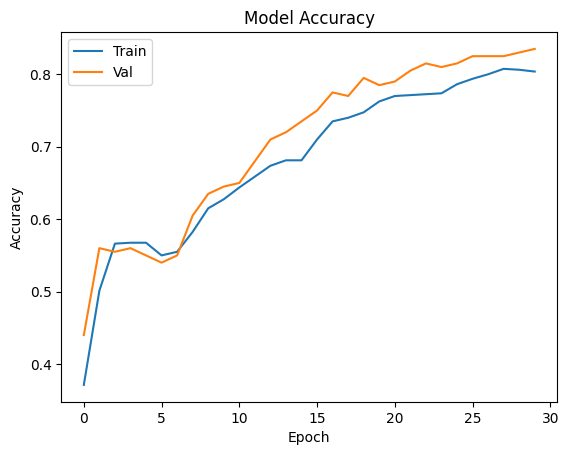

In [68]:
# plot
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [67]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

7/7 [==============================] - 1s 81ms/step - loss: 0.4878 - acc: 0.8350
Accuracy on test set is: 0.8349999785423279


In [72]:
X_test

array([[[ 0.35765054],
        [-0.06085448],
        [ 0.16102608],
        ...,
        [-0.24947513],
        [-0.10919699],
        [-0.32088003]],

       [[ 0.07824357],
        [ 0.49678678],
        [ 1.16884845],
        ...,
        [-0.11164533],
        [-0.01550834],
        [-0.58503416]],

       [[-0.10272504],
        [ 0.27210414],
        [ 1.41008215],
        ...,
        [-0.72699718],
        [-0.45217671],
        [-2.22217649]],

       ...,

       [[-2.54436492],
        [-1.44311878],
        [ 0.15073313],
        ...,
        [-0.0380183 ],
        [ 0.14072084],
        [-0.31425769]],

       [[ 1.52007518],
        [ 0.03282292],
        [-1.8248145 ],
        ...,
        [-0.47029059],
        [ 0.16375661],
        [-0.45672101]],

       [[ 0.68089551],
        [ 1.00099959],
        [ 0.12314749],
        ...,
        [ 0.11115224],
        [ 0.94706569],
        [ 0.97340326]]])

In [71]:
model.predict(X_test)

7/7 [==============================] - 1s 108ms/step


array([[0.01436207, 0.4143016 , 0.3573653 , 0.12523445, 0.9732253 ],
       [0.163529  , 0.20612796, 0.94445455, 0.19189228, 0.19749074],
       [0.16236237, 0.19066228, 0.96068865, 0.15616305, 0.1972707 ],
       [0.43575716, 0.8155858 , 0.6124399 , 0.29038346, 0.07188862],
       [0.02187353, 0.5638343 , 0.14382839, 0.2068187 , 0.963663  ],
       [0.14688009, 0.19118205, 0.959265  , 0.15722966, 0.21261005],
       [0.09261733, 0.13827088, 0.9753274 , 0.09521097, 0.3034754 ],
       [0.04806736, 0.6352151 , 0.09213734, 0.4791869 , 0.9053503 ],
       [0.31561992, 0.24375126, 0.9006793 , 0.28144002, 0.11722458],
       [0.2823087 , 0.897545  , 0.53189117, 0.2577077 , 0.04674598],
       [0.6573949 , 0.67579174, 0.13207845, 0.8840709 , 0.18904491],
       [0.26522627, 0.899113  , 0.53286695, 0.27820423, 0.04976861],
       [0.732765  , 0.5628655 , 0.281214  , 0.8527035 , 0.0442264 ],
       [0.61006016, 0.6487293 , 0.11877627, 0.896677  , 0.22922112],
       [0.59982693, 0.6523475 , 0.

In [73]:
# save h5
model.save('model_LSTM.h5')

In [74]:
new_model = tf.keras.models.load_model('model_LSTM.h5')
new_model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (None, 40, 64)            16896     
                                                                 
 lstm_50 (LSTM)              (None, 40, 64)            33024     
                                                                 
 lstm_51 (LSTM)              (None, 64)                33024     
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_34 (Dense)            (None, 5)                 325       
                                                                 
Total params: 87,429
Trainable params: 87,429
Non-trainable params: 0
_________________________________________________________________


In [149]:
import wave
import csv
import json
import librosa
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    to_append = f'Signal'
    for e in mfcc:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predictCoba(audio):
    model = tf.keras.models.load_model('model_LSTM.h5')
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    
    scaler = StandardScaler()
    X = data.drop(['label', 'filename'], axis=1)
    X = scaler.fit_transform(X)
    X = np.expand_dims(X, axis=2)
    pred = model.predict(X)

    print(pred)
    pred = np.argmax(pred, axis=1)
    print(pred)

In [152]:
predictCoba('data/training/MS/New_MS_007.wav')

1/1 [==============================] - 1s 1s/step
[[0.6787393  0.7603664  0.58539265 0.32043433 0.1216297 ]]
[1]


In [154]:
data = pd.read_csv('test.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,label
0,Signal,-467.817963,143.960175,84.976707,48.534489,21.047846,22.548452,8.73469,9.621476,1.585526,...,-2.580005,-4.776423,-3.586074,-1.474507,-2.609293,-2.645078,-2.523792,-1.24338,-1.447043,NaN
